In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [147]:
# Set the root directory to the audio files
root_dir = r"C:\Users\Kuldeep\Desktop\Demonstration\cat_dog"
os.chdir(root_dir)

In [148]:
# Get a list of file names
file_names = os.listdir()

In [149]:
len(file_names)

279

In [150]:
# Initialize an empty dataframe for storing the MFCC features
final_dataset = pd.DataFrame()

In [151]:
# Loop over each audio file and extract MFCC features
for file_name in file_names:
    # Load the audio file using librosa
    audio, sampling_rate = librosa.load(file_name)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=13)

    # Calculate the mean and standard deviation of each MFCC coefficient
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)

    # Concatenate the mean and standard deviation values to form a feature vector
    feature_vector = np.concatenate((mfccs_mean, mfccs_std), axis=0)

    # Append the feature vector and the label to the final dataset
    label = file_name.split("_")[0]
    feature_vector = np.append(feature_vector, label)
    final_dataset = final_dataset.append(pd.Series(feature_vector), ignore_index=True)

C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_14404\3468636346.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_dataset = final_dataset.append(pd.Series(feature_vector), ignore_index=True)
C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_14404\3468636346.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sampling_rate = librosa.load(file_name)
C:\Users\Kuldeep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


NoBackendError: 

In [ ]:
# Rename the columns of the final dataset
columns = ["mfcc_" + str(i) for i in range(1, 27)] + ["label"]
final_dataset.columns = columns

print("MFCC features extracted for", len(file_names), "audio files")

MFCC features extracted for 277 audio files


In [ ]:
# Split the final dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_dataset.drop('label', axis=1),
                                                    final_dataset['label'],
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
# Normalize the feature variables
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
# Save the scaler object to a pickle file
#joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# Choose a machine learning algorithm and train the model on the training set
model = LogisticRegression(random_state=42)
model.fit(X_train_norm, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Evaluate the performance of the trained model on the testing set
y_pred = model.predict(X_test_norm)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='cat')
recall = recall_score(y_test, y_pred, pos_label='cat')
f1 = f1_score(y_test, y_pred, pos_label='cat')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9285714285714286
Precision: 0.9215686274509803
Recall: 0.9591836734693877
F1 score: 0.9400000000000001


In [ ]:
# Save best SVM classifier weights for use at prediction

# import joblib
# # Save the trained model as a pickle file
# joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

The predicted class label is: ['cat']


C:\Users\Kuldeep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Exception ignored in: <function Wave_write.__del__ at 0x000001495E039D80>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\wave.py", line 326, in __del__
    self.close()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\wave.py", line 444, in close
    self._ensure_header_written(0)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\wave.py", line 464, in _ensure_header_written
    raise Error('sample width not specified')
wave.Error: sample width not specified
Exception ignored in: <function Wave_write.__del__ at 0x000001495E039D80>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\wave.py", line 326, in __del__
    self.close()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoun

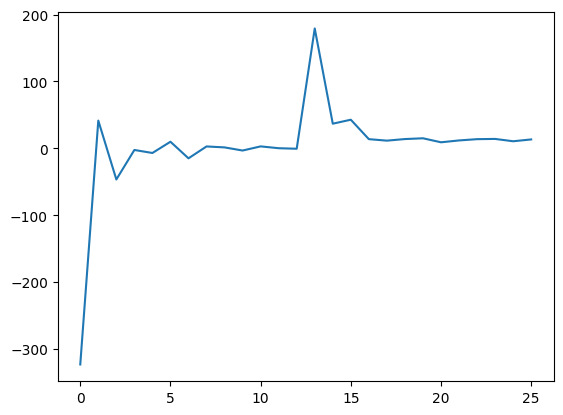

In [ ]:
# Load the audio file
new_audio_file = r'C:\Users\Kuldeep\Desktop\Demonstration\cat_test_sound.wav'

audio, sampling_rate = librosa.load(new_audio_file)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=13)

# Calculate the mean and standard deviation of each MFCC coefficient
mfccs_mean = np.mean(mfccs, axis=1)
mfccs_std = np.std(mfccs, axis=1)

# Concatenate the mean and standard deviation values to form a feature vector
feature_vector = np.concatenate((mfccs_mean, mfccs_std), axis=0)

# Normalize the feature variables using the same scaler used for training
feature_vector_norm = scaler.transform(feature_vector.reshape(1, -1))

#model1 = joblib.load('logistic_regression_model.pkl')

# Use the trained model to predict the class label
pred_label = model.predict(feature_vector_norm)

# Print the predicted class label
print("The predicted class label is:", pred_label)

plt.plot(feature_vector)
# Play the audio file
ipd.display(ipd.Audio(audio, rate=sampling_rate))